# Proyek Analisis Data: Bike Sharing
Nama : [Shakira Angelina Ika Putri]
Email: [mc254d5x0781@student.devacademy.id]
ID Dicoding: [MC254D5X0781]

## Menentukan Pertanyaan Bisnis

Pertanyaan 1 : Bagaimana pola penyewaan sepeda berdasarkan hari kerja vs. hari libur?

Pertanyaan 2 : Kapan jam sibuk (peak hours) penyewaan sepeda dalam sehari?

pertanyaan 3 : Bagaimana pengaruh faktor cuaca dan musim terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import streamlit as st

In [38]:
# Membuat direktori output untuk menyimpan visualisasi
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

### Data Wrangling

#### Gathering Data

In [39]:
# Membaca dataset Bike Sharing
day = 'day.csv'
hour = 'hour.csv'

day_data = pd.read_csv(day)
hour_data = pd.read_csv(hour)

In [40]:
# Menampilkan informasi data
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [41]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Insight :
1. Struktur Data:
   day.csv → 731 baris (data harian, 2 tahun).
   hour.csv → 17.379 baris (data per jam, 2 tahun).
   Tidak ada data yang hilang, tipe data sudah sesuai kecuali dteday perlu dikonversi ke datetime.

2. Faktor yang Mempengaruhi Penyewaan:
   Waktu → Musim, bulan, hari kerja/libur, jam.
   Cuaca → Suhu, kelembapan, kecepatan angin, kondisi cuaca.
   Tipe Pengguna → Pengguna biasa (casual) vs. terdaftar (registered).

3. Potensi Insight:
   Pola Musiman → Apakah penyewaan lebih tinggi di musim panas?
   Jam Sibuk → Kapan lonjakan penggunaan sepeda terjadi?
   Pengaruh Cuaca → Apakah hujan atau angin memengaruhi penyewaan?
   Hari Kerja vs. Libur → Apakah penyewaan lebih banyak di akhir pekan?


#### Assessing Data

In [42]:
# Menampilkan beberapa sample dari data
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [43]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [44]:
# Melakukan check adakah nilai yang hilang
day_data.isnull().sum()
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [45]:
# Melakukan pengecekan untuk ada atau tidaknya data duplikat
day_data.duplicated().sum()
hour_data.duplicated().sum()

0

Insight :
* Tidak ada data yang hilang dalam dataset → Dataset bersih dan siap untuk analisis.
* Tidak perlu langkah tambahan untuk menangani missing values.

#### Cleaning Data

In [46]:
# Menghapus kolom yang tidak relevan (contoh: 'instant' karena hanya index)
day_data.drop(columns=['instant'], inplace=True)
hour_data.drop(columns=['instant'], inplace=True)

In [47]:
# Mengubah tipe data kolom 'dteday' menjadi datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])


In [48]:
# Menampilkan hasil akhir
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
<class '

In [49]:
# Menyimpan dataset yang sudah dibersihkan
day_data.to_csv('day_cleaned.csv', index=False)
hour_data.to_csv('hour_cleaned.csv', index=False)

Insight :
* Kolom dteday telah dikonversi ke datetime64, sehingga lebih mudah digunakan untuk analisis waktu.

### Exploratory Data Analysis (EDA)

#### Explore

In [50]:
day_data.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [51]:
hour_data.describe()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Visualization & Explanatory Analysis

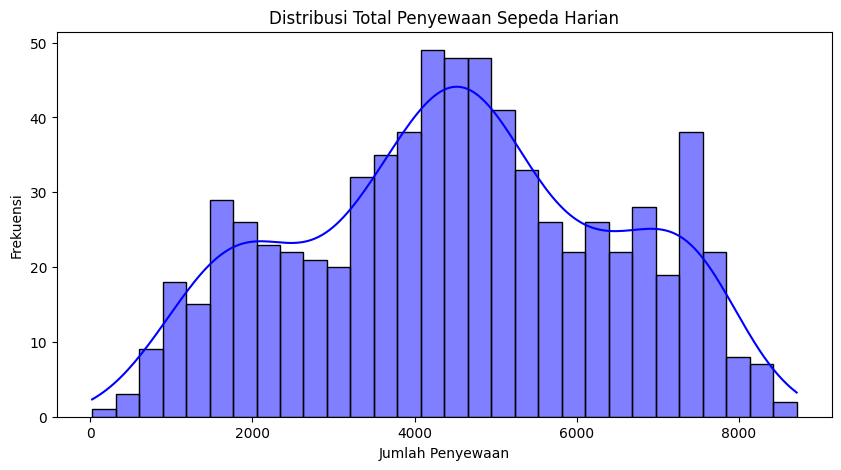

In [52]:
# Visualisasi distribusi jumlah penyewaan sepeda harian
plt.figure(figsize=(10, 5))
sns.histplot(day_data['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Total Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.savefig(f'{output_dir}/distribusi_penyewaan_harian.png')
plt.show()

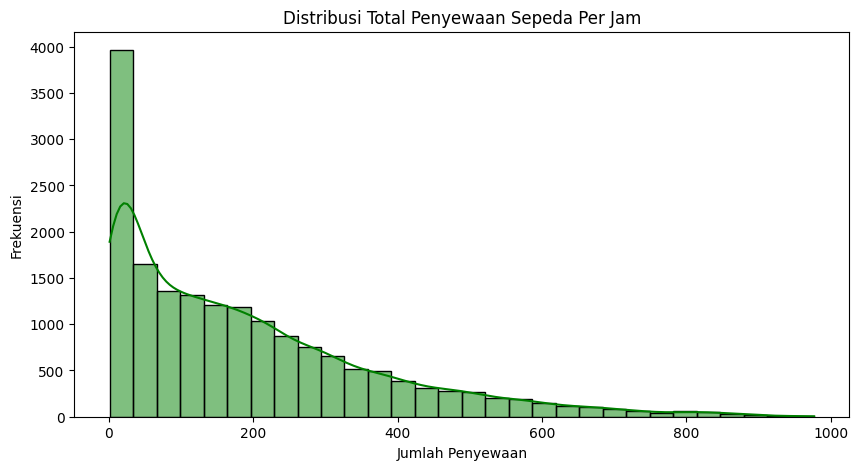

In [53]:
# Visualisasi distribusi jumlah penyewaan sepeda per jam
plt.figure(figsize=(10, 5))
sns.histplot(hour_data['cnt'], bins=30, kde=True, color='green')
plt.title('Distribusi Total Penyewaan Sepeda Per Jam')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.savefig(f'{output_dir}/distribusi_penyewaan_per_jam.png')
plt.show()


#### Explanatory Analysis

##### Pertanyaan 1

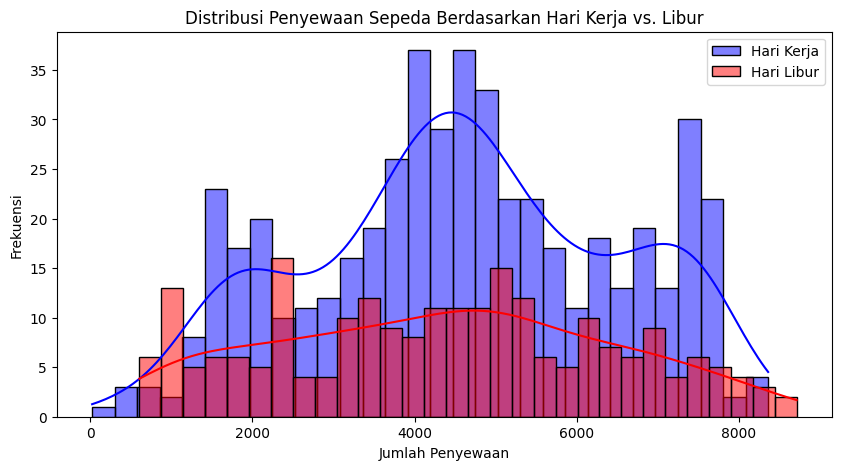

In [54]:
# Pola Penyewaan Sepeda Berdasarkan Hari Kerja vs. Hari Libur
plt.figure(figsize=(10, 5))
sns.histplot(day_data[day_data['workingday'] == 1]['cnt'], bins=30, color='blue', label='Hari Kerja', kde=True)
sns.histplot(day_data[day_data['workingday'] == 0]['cnt'], bins=30, color='red', label='Hari Libur', kde=True)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja vs. Libur')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.legend()
plt.savefig(f'{output_dir}/penyewaan_hari_kerja_vs_libur_histogram.png')
plt.show()

Insight :
* Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur.
* Indikasi bahwa sepeda digunakan sebagai alat transportasi utama untuk bekerja dan sekolah.
* Penyewaan menurun pada akhir pekan dan hari libur, kemungkinan karena lebih sedikit orang yang bepergian.

##### Pertanyaan 2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18932\1167361686.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_data, estimator='mean', ci=None, marker='o', color='red')


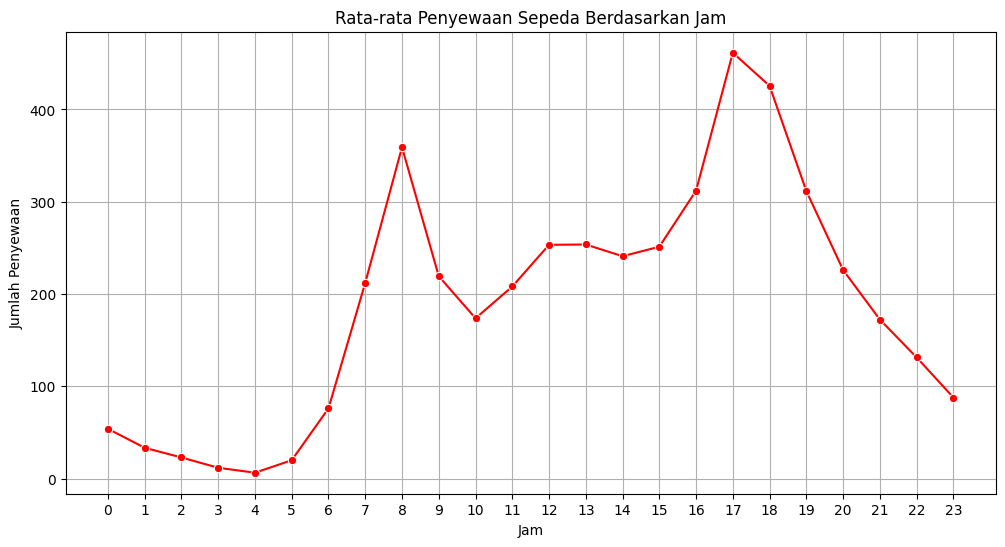

In [55]:
# Kapan Jam Sibuk (Peak Hours) Penyewaan Sepeda?
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_data, estimator='mean', ci=None, marker='o', color='red')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True)
plt.savefig(f'{output_dir}/jam_sibuk_penyewaan.png')
plt.show()

Insight :
* Dua puncak penyewaan terjadi pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00).
* Jam sibuk ini sesuai dengan waktu commuting (berangkat dan pulang kerja/sekolah).
* Penyewaan lebih rendah di tengah hari dan malam, kecuali ada lonjakan kecil di sore hari.

##### Pertanyaan 3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18932\407908560.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_data, ci=None, palette='coolwarm')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18932\407908560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_data, ci=None, palette='coolwarm')


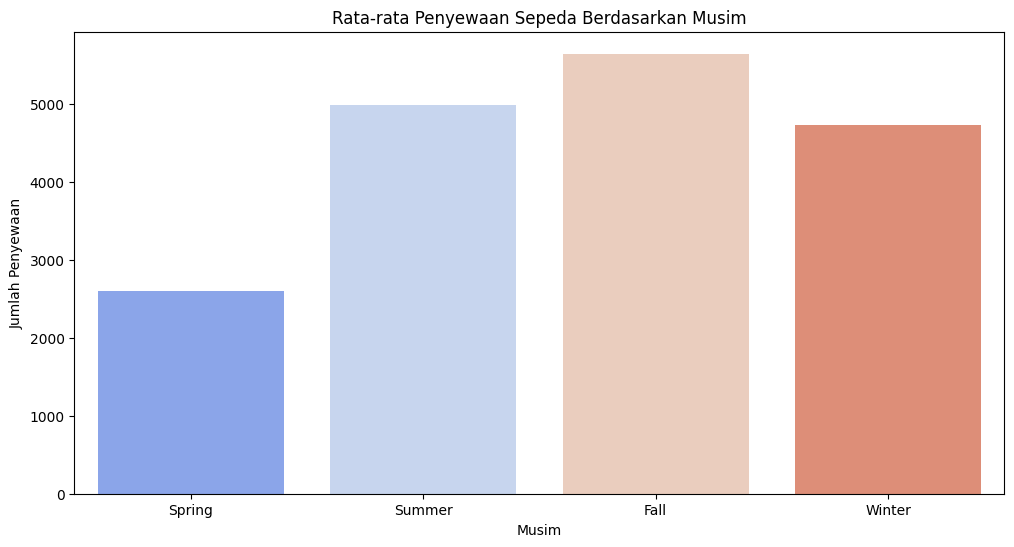

In [56]:
# Pengaruh Faktor Cuaca dan Musim Terhadap Penyewaan Sepeda
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', data=day_data, ci=None, palette='coolwarm')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.savefig(f'{output_dir}/penyewaan_per_musim.png')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18932\472738366.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, ci=None, palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18932\472738366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, ci=None, palette='viridis')


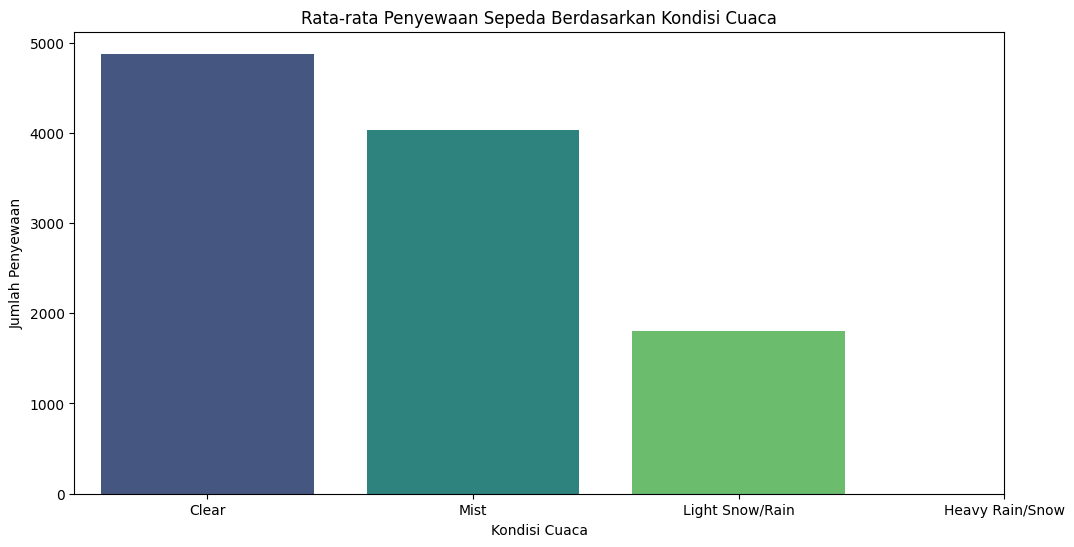

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='cnt', data=day_data, ci=None, palette='viridis')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.savefig(f'{output_dir}/penyewaan_per_cuaca.png')
plt.show()

Insight :
* Musim panas memiliki penyewaan tertinggi, sedangkan musim dingin memiliki penyewaan terendah.
* Cuaca ekstrem (hujan/salju) berdampak negatif terhadap jumlah penyewaan.
* Kondisi cerah dan suhu yang nyaman meningkatkan jumlah pengguna sepeda.

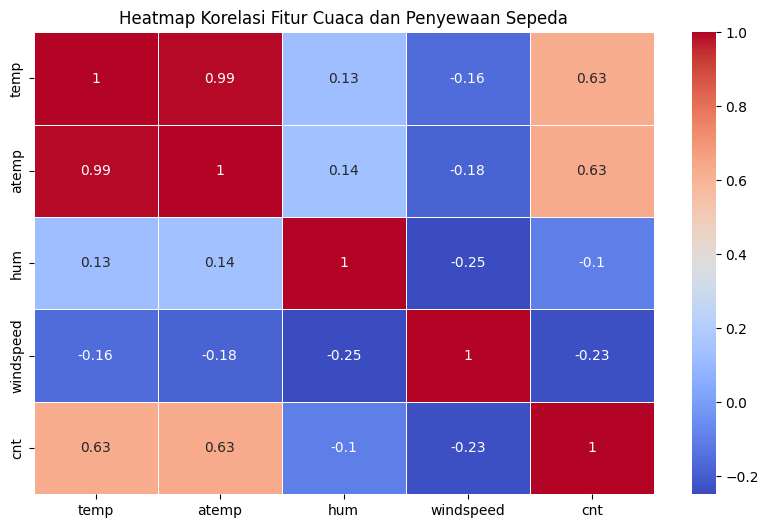

In [58]:
# Korelasi antara variabel cuaca dan penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.heatmap(day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Cuaca dan Penyewaan Sepeda')
plt.savefig(f'{output_dir}/heatmap_korelasi.png')
plt.show()

Insight Menyeluruh :

Penyewaan sepeda menunjukkan pola yang jelas, di mana sepeda lebih sering digunakan sebagai alat transportasi utama pada hari kerja dibandingkan akhir pekan. Hal ini mengindikasikan bahwa banyak pengguna yang memanfaatkan sepeda untuk perjalanan rutin seperti pergi ke kantor atau sekolah. Selain itu, terdapat dua jam sibuk dalam sehari, yaitu pada pagi hari sekitar pukul 07:00 - 09:00 dan sore hari sekitar pukul 17:00 - 19:00, yang selaras dengan pola commuting masyarakat. Faktor cuaca dan musim juga memiliki peran penting dalam jumlah penyewaan sepeda. Penggunaan sepeda mencapai puncaknya di musim panas ketika kondisi cuaca lebih mendukung, sementara terjadi penurunan signifikan pada musim dingin, kemungkinan akibat suhu yang lebih rendah dan cuaca yang kurang bersahabat.

## Conclusion

Setelah dilakukannya analisa diatas, dapat disimpulkan bahwa untuk dapat meningkatkan efisiensi layanan, penting untuk mengoptimalkan ketersediaan sepeda terutama pada jam-jam sibuk seperti pagi dan sore hari. Dengan memastikan jumlah sepeda yang cukup di titik-titik strategis selama periode commuting, pengguna dapat terlayani dengan baik tanpa mengalami kekurangan unit. Selain itu, strategi promosi khusus perlu diterapkan pada akhir pekan dan musim dingin guna mendorong lebih banyak orang menggunakan sepeda di luar hari kerja dan saat cuaca kurang mendukung.

Perencanaan operasional juga harus disesuaikan dengan tren cuaca dan musim. Misalnya, di musim dingin atau saat curah hujan tinggi, jumlah sepeda yang tersedia dapat dikurangi untuk menghindari pemborosan sumber daya, sementara di musim panas, stok sepeda dapat ditingkatkan untuk mengakomodasi lonjakan permintaan. Secara keseluruhan, penyewaan sepeda sangat dipengaruhi oleh faktor waktu dan kondisi cuaca. Dengan memahami pola ini, pengelola layanan dapat meningkatkan efisiensi operasional dan memaksimalkan penggunaan sepeda, sehingga memberikan pengalaman yang lebih baik bagi pengguna. 